In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import manifold

In [2]:
class AdjacencyMatrix:
    def __init__(self,point_node_number,maximum_distance):

        self.adjacency_matrix =np.zeros((point_node_number,point_node_number))
        self.maximum_distance = maximum_distance
        self.nodes_number = point_node_number
        self.depot = 0
        self.time_table = {}
        for i in range(0,point_node_number):
           for j in range(0,point_node_number): 
                if i==j:
                    continue
                elif self.adjacency_matrix[i][j] !=self.adjacency_matrix[j][i] :

                    if self.adjacency_matrix[i][j]==0:
                        self.adjacency_matrix[i][j]=self.adjacency_matrix[j][i]
                    elif self.adjacency_matrix[j][i] == 0:
                        self.adjacency_matrix[j][i]=self.adjacency_matrix[i][j]
                    continue
                else:
                    self.adjacency_matrix[i][j] = np.random.randint(1,maximum_distance)
        
        
    def getNodeNumber(self):
        return self.nodes_number 

    def getMaxdistance(self):
        return self.maximum_distance 

    def getAdjacencyMatrix(self):
        return self.adjacency_matrix




In [ ]:
TimeCountDict = {}
for t in range(0,23):
    TimeCountDict[i] = []

In [280]:
class VRPDataset:
    def __init__(self,Adjacency_matrix):
        self.Adjacency_matrix = Adjacency_matrix
        self.adjacency_matrix = self.Adjacency_matrix.getAdjacencyMatrix()
        self.nodes_number = self.Adjacency_matrix.getNodeNumber()
        self.max_distance = self.Adjacency_matrix.getMaxdistance()
        self.depot = 0
        self.num_vehicle=1
        self.time_table = {}

        
        adist = np.array(self.adjacency_matrix)
        amax = np.amax(adist)
        adist /= amax

        mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
        results = mds.fit(adist)

        self.coords = results.embedding_

    def setRandomTimeWindow(self,time_window=4):
        
        
        node_number = self.coords.shape[0]
        assigned_node_index = [self.depot]
        assigned_node=[-1]*node_number
        assigned_node[self.depot] = 0
        
        rest = (node_number-1)%time_window
        timw_phase = (node_number-1)//time_window
        for phase in range(1,timw_phase+1):
            window_count = 0
            while(True):
                if window_count==time_window:
                    break
                else:
                    node = np.random.randint(node_number)
                    if node in assigned_node_index:
                        continue
                    else:
                        assigned_node_index.append(node)
                        assigned_node[node]=phase
                        window_count+=1
        phase+=1
        print(rest)
        for r in range(0,rest):
            while(True):
                node = np.random.randint(node_number)
                if node in assigned_node_index:
                    continue
                else:
                    assigned_node_index.append(node)
                    assigned_node[node]=phase
                    break
        for idx,key in enumerate(assigned_node_index):
            self.time_table[key] = assigned_node[idx]








            
    def setDepot(self,depot_index):
        self.depot = depot_index

    def setVehicles(self,num_vehicle):
        self.num_vehicle = num_vehicle

    def getTimeTable(self):
        return self.time_table

    def getCoordinates(self):
        return self.coords
    
    def plot_coords(self):
        coords = self.coords
        cities = []
        for i in range(0,len(coords)):
            if i ==self.depot:
                cities.append('depot')
            cities.append('city_{}'.format(i+1))

        plt.subplots_adjust(bottom = 0.1)
        plt.scatter(
            coords[:, 0], coords[:, 1], marker = 'o'
            )
        for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
            plt.annotate(
                label,
                xy = (x, y), xytext = (-20, 20),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

        plt.show()
    

    

In [281]:
class Vehecle:
    def __init__(self,capacity,travel_nodes,depot,adjacency_matrix):
        self.depot = depot
        self.Node_visit_capacity = capacity
        self.travel_nodes = travel_nodes
        self.current_positon = self.depot
        self.adjacency_matrix = adjacency_matrix
        
    def updateCurrentPosition(self,position):
        self.current_positon=position

    def getTotalTraveilingDistance(self):
        Travel_total = self.adjacency_matrix[self.depot][self.travel_nodes[0]]
        for i in range(1,len(self.travel_nodes)):
            Travel_total+=self.adjacency_matrix[i-1][i]
            
        return Travel_total

In [282]:
ADJ = AdjacencyMatrix(10,100)
VRP_dataset = VRPDataset(ADJ)

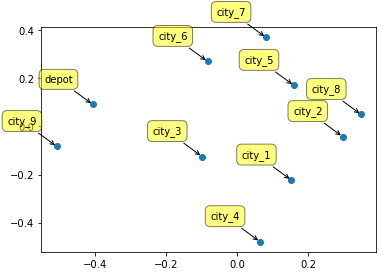

In [283]:
VRP_dataset.plot_coords()

In [284]:
VRP_dataset.setRandomTimeWindow()

1


In [288]:
a =VRP_dataset.getTimeTable()

In [295]:
!pip install pulp